In [3]:
import tensorflow as tf
# print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']

print(get_available_gpus()
## Load mnist Data 
mnist = tf.keras.datasets.mnist

## Unpack data to taining and testing sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Normalize the data to make it easier to the network to learn 
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

## Building the Model
model = tf.keras.models.Sequential() ## use the sequential model
model.add(tf.keras.layers.Flatten()) ## add first layer "input layer"
model.add(tf.keras.layers.Dense(128, activation= tf.nn.relu)) ## add first hidden layer
model.add(tf.keras.layers.Dense(128, activation= tf.nn.relu)) ## add second hidden layer
model.add(tf.keras.layers.Dense(10, activation= tf.nn.softmax)) ## add the output layer

## Define parameters for the trainning of the model
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'],)
## Train the model
# model.fit(x_train, y_train, epochs=3)

In [69]:
## Test the model
val_loss , val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.1033 - accuracy: 0.9689
0.10329145193099976 0.9689000248908997


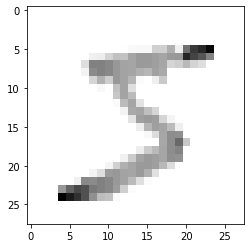

In [71]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

In [72]:
## Save the model
model.save('myepic_num_reader')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: myepic_num_reader\assets


In [74]:
## Load the saved model
new_model = tf.keras.models.load_model('myepic_num_reader')

In [87]:
## Make predictions
predictios = new_model.predict([x_test])

In [92]:
import numpy as np

print(predictios[81])
np.argmax(predictios[81])


[1.12466885e-04 4.48194186e-07 1.38138341e-06 1.16579013e-08
 1.23083328e-05 1.56102578e-05 9.99855876e-01 1.01179694e-06
 1.91725093e-07 7.00656130e-07]


6

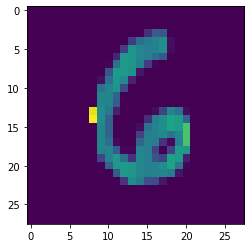

In [93]:
plt.imshow(x_test[81])
plt.show()